In [1]:
#importing the required libraries:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import re

In [2]:
#reading the data:
movies = pd.read_csv("movies.dat",sep="::",engine="python",names=["movieId", "title", "genres"],encoding="latin-1")
ratings = pd.read_csv("ratings.dat",sep="::",engine="python",names=["userId", "movieId", "rating", "timestamp"],encoding="latin-1")
print(movies.shape)
print(ratings.shape)


(3883, 3)
(1000209, 4)


In [3]:
#converting to csv file :
movies.to_csv("movies.csv", index=False)
ratings.to_csv("ratings.csv", index=False)


In [4]:
movies_df = pd.read_csv("movies.csv")
ratings_df = pd.read_csv("ratings.csv")

In [5]:
# Inspect movies data
print("Movies Data Head:")
print(movies_df.head())
print("\nMovies Data Info:")
print(movies_df.info())

# Inspect ratings data
print("\nRatings Data Head:")
print(ratings_df.head())
print("\nRatings Data Info:")
print(ratings_df.info())

Movies Data Head:
   movieId                               title                        genres
0        1                    Toy Story (1995)   Animation|Children's|Comedy
1        2                      Jumanji (1995)  Adventure|Children's|Fantasy
2        3             Grumpier Old Men (1995)                Comedy|Romance
3        4            Waiting to Exhale (1995)                  Comedy|Drama
4        5  Father of the Bride Part II (1995)                        Comedy

Movies Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  3883 non-null   int64 
 1   title    3883 non-null   object
 2   genres   3883 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB
None

Ratings Data Head:
   userId  movieId  rating  timestamp
0       1     1193       5  978300760
1       1      661       3  978302109
2       1      914  

In [7]:
# 1. Data Cleaning & Feature Extraction

# Extract Year from Title
def extract_year(title):
    match = re.search(r'\((\d{4})\)', title)
    if match:
        return int(match.group(1))
    return None

movies_df['year'] = movies_df['title'].apply(extract_year)


# Check duplicates
print(f"Duplicate ratings: {ratings_df.duplicated().sum()}")
print(f"Duplicate movies: {movies_df.duplicated(subset=['movieId']).sum()}")

# Split genres
movies_df['genres_list'] = movies_df['genres'].str.split('|')
res_exploded = movies_df.explode('genres_list')
# Explode genres
genres_exploded = movies_df.explode('genres_list')


Duplicate ratings: 0
Duplicate movies: 0


C:\Users\Swatika\AppData\Local\Temp\ipykernel_3392\1154469589.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='rating', data=ratings_df, palette='viridis')
C:\Users\Swatika\AppData\Local\Temp\ipykernel_3392\1154469589.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='magma')


(0.0, 1000.0)

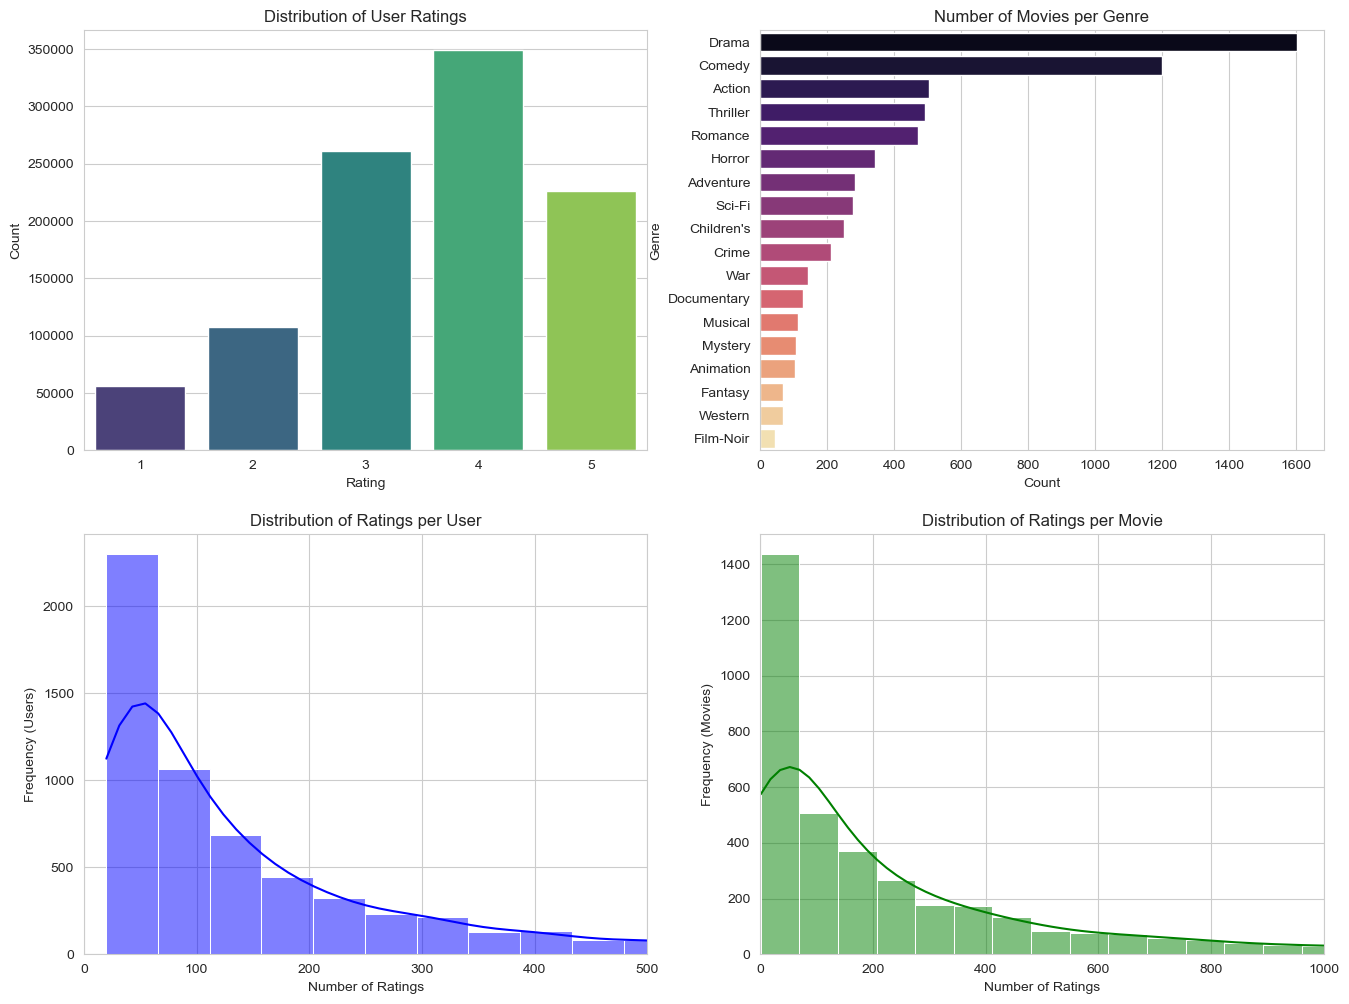

In [8]:
# 2. Univariate Analysis

# Set plot style
sns.set_style("whitegrid")
plt.figure(figsize=(16, 12))

# Plot 1: Distribution of Ratings
plt.subplot(2, 2, 1)
sns.countplot(x='rating', data=ratings_df, palette='viridis')
plt.title('Distribution of User Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')

# Plot 2: Top Genres by Number of Movies
plt.subplot(2, 2, 2)
genre_counts = genres_exploded['genres_list'].value_counts()
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='magma')
plt.title('Number of Movies per Genre')
plt.xlabel('Count')
plt.ylabel('Genre')

# Plot 3: Distribution of Number of Ratings per User
plt.subplot(2, 2, 3)
user_rating_counts = ratings_df.groupby('userId')['rating'].count()
sns.histplot(user_rating_counts, bins=50, kde=True, color='blue')
plt.title('Distribution of Ratings per User')
plt.xlabel('Number of Ratings')
plt.ylabel('Frequency (Users)')
plt.xlim(0, 500) # Limiting x-axis for better visibility of the head

# Plot 4: Distribution of Number of Ratings per Movie
plt.subplot(2, 2, 4)
movie_rating_counts = ratings_df.groupby('movieId')['rating'].count()
sns.histplot(movie_rating_counts, bins=50, kde=True, color='green')
plt.title('Distribution of Ratings per Movie')
plt.xlabel('Number of Ratings')
plt.ylabel('Frequency (Movies)')
plt.xlim(0, 1000)


In [9]:
plt.tight_layout()
plt.savefig('univariate_analysis.png')

# Output sparsity and basic stats
n_users = ratings_df['userId'].nunique()
n_items = ratings_df['movieId'].nunique()
n_ratings = len(ratings_df)
total_possible_ratings = n_users * n_items
sparsity = 1 - (n_ratings / total_possible_ratings)

print(f"Number of Users: {n_users}")
print(f"Number of Items (Movies in ratings): {n_items}")
print(f"Sparsity of the User-Item Matrix: {sparsity:.4f}")

# Return top movies by rating count
print("\nTop 10 Most Rated Movies:")
top_movies = movie_rating_counts.sort_values(ascending=False).head(10)
# Merge with titles
top_movies_df = pd.DataFrame(top_movies).merge(movies_df[['movieId', 'title']], on='movieId', how='left')
print(top_movies_df)

Number of Users: 6040
Number of Items (Movies in ratings): 3706
Sparsity of the User-Item Matrix: 0.9553

Top 10 Most Rated Movies:
   movieId  rating                                              title
0     2858    3428                             American Beauty (1999)
1      260    2991          Star Wars: Episode IV - A New Hope (1977)
2     1196    2990  Star Wars: Episode V - The Empire Strikes Back...
3     1210    2883  Star Wars: Episode VI - Return of the Jedi (1983)
4      480    2672                               Jurassic Park (1993)
5     2028    2653                         Saving Private Ryan (1998)
6      589    2649                  Terminator 2: Judgment Day (1991)
7     2571    2590                                 Matrix, The (1999)
8     1270    2583                          Back to the Future (1985)
9      593    2578                   Silence of the Lambs, The (1991)


<Figure size 640x480 with 0 Axes>

C:\Users\Swatika\AppData\Local\Temp\ipykernel_3392\1704315210.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_avg_ratings.values, y=genre_avg_ratings.index, palette='coolwarm')
C:\Users\Swatika\AppData\Local\Temp\ipykernel_3392\1704315210.py:35: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ratings_per_month = ratings_df.resample('M', on='datetime')['rating'].count()


Top 5 Genres by Average Rating:
genre
Film-Noir      4.075188
Documentary    3.933123
War            3.893327
Drama          3.766332
Crime          3.708679
Name: rating, dtype: float64

Bottom 5 Genres by Average Rating:
genre
Adventure     3.477257
Sci-Fi        3.466521
Fantasy       3.447371
Children's    3.422035
Horror        3.215013
Name: rating, dtype: float64

Correlation between number of ratings and average rating: 0.3580


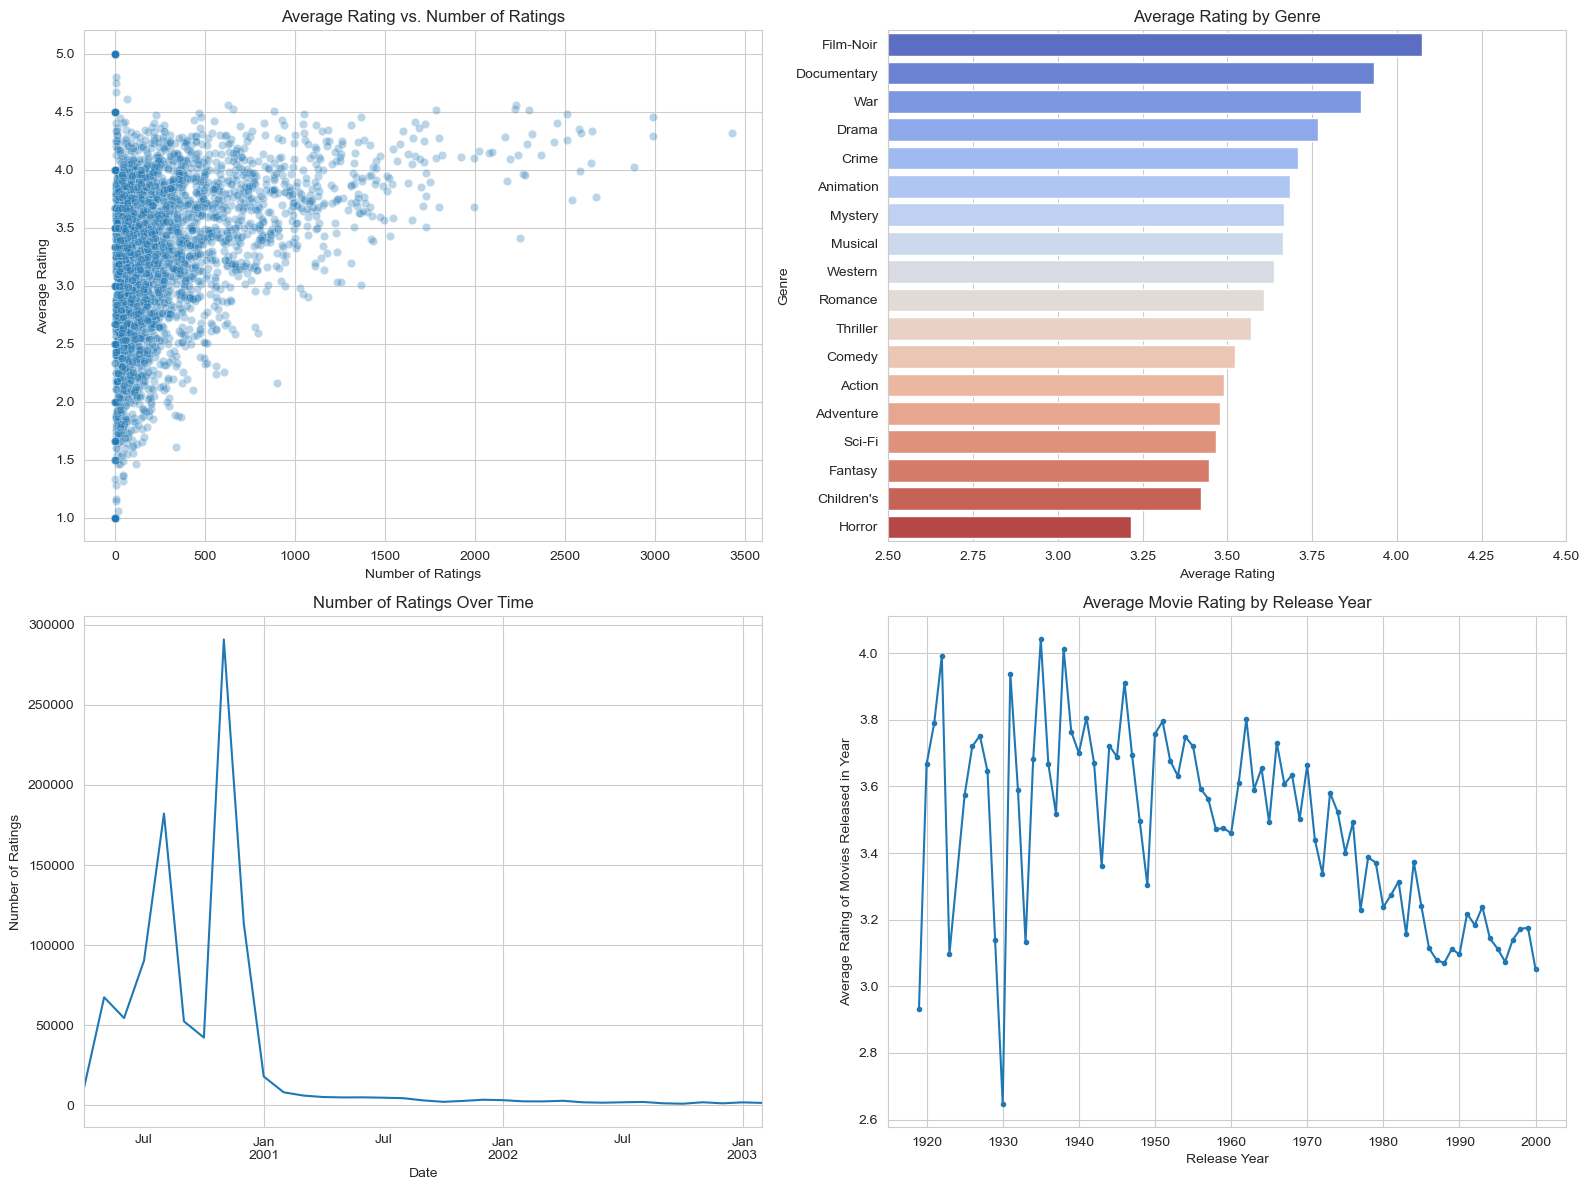

In [10]:
# 3. Bivariate & Multivariate Analysis

# Calculate average rating and count per movie
movie_stats = ratings_df.groupby('movieId').agg({'rating': ['mean', 'count']})
movie_stats.columns = ['avg_rating', 'rating_count']
movie_stats = movie_stats.merge(movies_df[['movieId', 'title', 'genres_list']], on='movieId', how='left')

plt.figure(figsize=(16, 12))

# Plot 5: Average Rating vs Number of Ratings (Jointplot style using scatter)
plt.subplot(2, 2, 1)
sns.scatterplot(x='rating_count', y='avg_rating', data=movie_stats, alpha=0.3)
plt.title('Average Rating vs. Number of Ratings')
plt.xlabel('Number of Ratings')
plt.ylabel('Average Rating')

# Plot 6: Average Rating per Genre
# We need to explode the genres again with the ratings joined
# Join ratings with movie genres
ratings_with_genres = ratings_df.merge(genres_exploded[['movieId', 'genres_list']], on='movieId', how='left')
# Rename column to genre
ratings_with_genres.rename(columns={'genres_list': 'genre'}, inplace=True)

genre_avg_ratings = ratings_with_genres.groupby('genre')['rating'].mean().sort_values(ascending=False)

plt.subplot(2, 2, 2)
sns.barplot(x=genre_avg_ratings.values, y=genre_avg_ratings.index, palette='coolwarm')
plt.title('Average Rating by Genre')
plt.xlabel('Average Rating')
plt.ylabel('Genre')
plt.xlim(2.5, 4.5) # Zoom in to see differences

# Plot 7: Ratings Volume over Time
ratings_df['datetime'] = pd.to_datetime(ratings_df['timestamp'], unit='s')
ratings_per_month = ratings_df.resample('M', on='datetime')['rating'].count()

plt.subplot(2, 2, 3)
ratings_per_month.plot()
plt.title('Number of Ratings Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Ratings')
plt.grid(True)

# Plot 8: Average Rating vs Release Year
# We already extracted 'year' in the previous step, merge it into movie_stats
movie_stats_with_year = movie_stats.merge(movies_df[['movieId', 'year']], on='movieId', how='left')
# Clean out movies with no year or outlier years (if any)
movie_stats_with_year = movie_stats_with_year.dropna(subset=['year'])

# Group by year and take mean of average ratings
year_stats = movie_stats_with_year.groupby('year')['avg_rating'].mean()

plt.subplot(2, 2, 4)
plt.plot(year_stats.index, year_stats.values, marker='.', linestyle='-')
plt.title('Average Movie Rating by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Average Rating of Movies Released in Year')

plt.tight_layout()
plt.savefig('bivariate_analysis.png')

# Output some textual insights
print("Top 5 Genres by Average Rating:")
print(genre_avg_ratings.head())
print("\nBottom 5 Genres by Average Rating:")
print(genre_avg_ratings.tail())

# Correlation between count and rating
corr = movie_stats['rating_count'].corr(movie_stats['avg_rating'])
print(f"\nCorrelation between number of ratings and average rating: {corr:.4f}")

Users with < 20 ratings: 0 (0.00%)
Movies with < 10 ratings: 446 (12.03%)


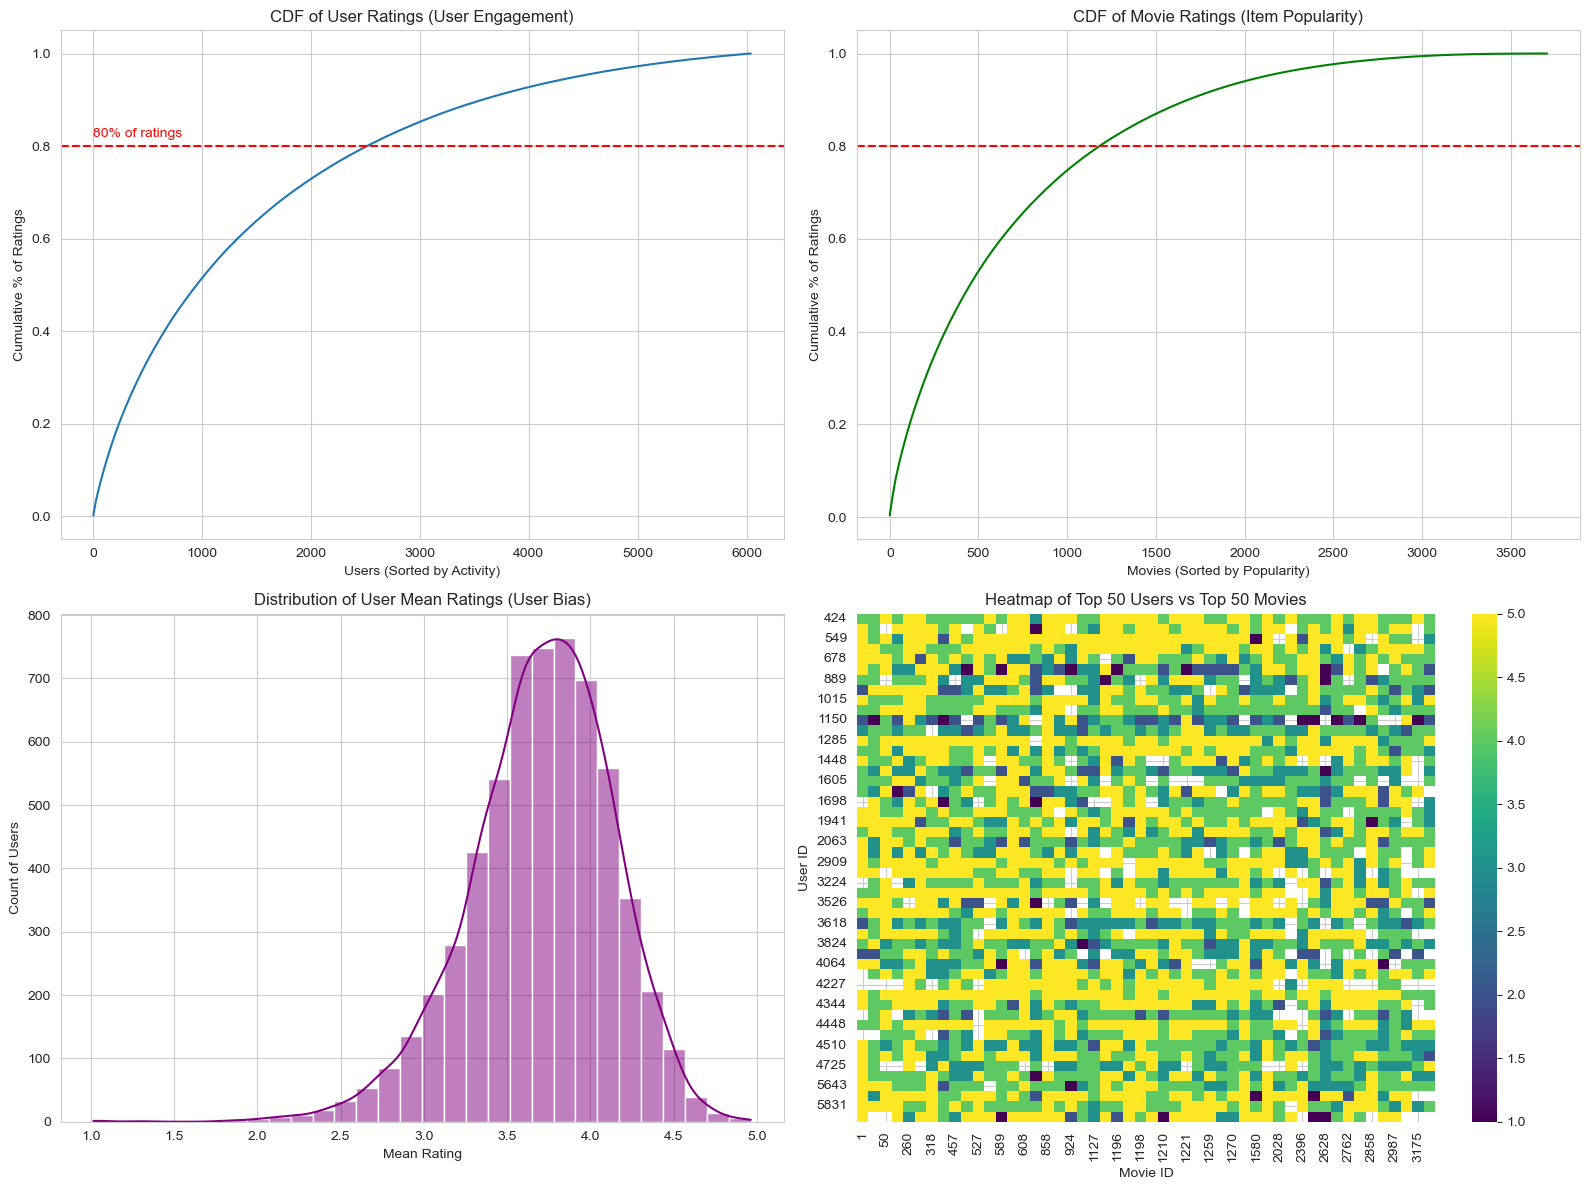

In [11]:
# 4. Advanced Analysis for Recommendation Systems

plt.figure(figsize=(16, 12))

# Plot 9: Cumulative Distribution of Ratings per User (User Engagement)
user_counts = ratings_df['userId'].value_counts().sort_values(ascending=False)
user_cumsum = user_counts.cumsum()
user_cumsum_norm = user_cumsum / user_cumsum.max()

plt.subplot(2, 2, 1)
plt.plot(np.arange(len(user_counts)), user_cumsum_norm.values)
plt.title('CDF of User Ratings (User Engagement)')
plt.xlabel('Users (Sorted by Activity)')
plt.ylabel('Cumulative % of Ratings')
plt.grid(True)
# Mark the 80% line
plt.axhline(y=0.8, color='r', linestyle='--')
plt.text(0, 0.82, '80% of ratings', color='red')

# Plot 10: Cumulative Distribution of Ratings per Movie (Item Popularity)
movie_counts = ratings_df['movieId'].value_counts().sort_values(ascending=False)
movie_cumsum = movie_counts.cumsum()
movie_cumsum_norm = movie_cumsum / movie_cumsum.max()

plt.subplot(2, 2, 2)
plt.plot(np.arange(len(movie_counts)), movie_cumsum_norm.values, color='green')
plt.title('CDF of Movie Ratings (Item Popularity)')
plt.xlabel('Movies (Sorted by Popularity)')
plt.ylabel('Cumulative % of Ratings')
plt.grid(True)
plt.axhline(y=0.8, color='r', linestyle='--')

# Plot 11: User Bias - Distribution of Mean Rating per User
user_mean_ratings = ratings_df.groupby('userId')['rating'].mean()
plt.subplot(2, 2, 3)
sns.histplot(user_mean_ratings, bins=30, kde=True, color='purple')
plt.title('Distribution of User Mean Ratings (User Bias)')
plt.xlabel('Mean Rating')
plt.ylabel('Count of Users')

# Plot 12: Interaction Matrix Heatmap (Subset)
# Take top 50 users and top 50 movies to visualize
top_users = ratings_df['userId'].value_counts().head(50).index
top_movies = ratings_df['movieId'].value_counts().head(50).index

subset_df = ratings_df[ratings_df['userId'].isin(top_users) & ratings_df['movieId'].isin(top_movies)]
pivot_table = subset_df.pivot(index='userId', columns='movieId', values='rating')

plt.subplot(2, 2, 4)
sns.heatmap(pivot_table, cmap='viridis', cbar=True)
plt.title('Heatmap of Top 50 Users vs Top 50 Movies')
plt.xlabel('Movie ID')
plt.ylabel('User ID')

plt.tight_layout()
plt.savefig('advanced_analysis.png')

# Calculate Cold Start stats
users_lt_20 = sum(user_counts < 20)
movies_lt_10 = sum(movie_counts < 10)

print(f"Users with < 20 ratings: {users_lt_20} ({users_lt_20/len(user_counts):.2%})")
print(f"Movies with < 10 ratings: {movies_lt_10} ({movies_lt_10/len(movie_counts):.2%})")

In [12]:
import pandas as pd
import numpy as np
from scipy.sparse.linalg import svds
from sklearn.metrics.pairwise import cosine_similarity

# 1. Load Data
movies = pd.read_csv('movies.csv')
ratings = pd.read_csv('ratings.csv')

# 2. Create User-Item Matrix (Pivot Table)
# Rows = Users, Cols = Movies, Values = Ratings
user_item_matrix = ratings.pivot(index='userId', columns='movieId', values='rating').fillna(0)
R = user_item_matrix.values

# --- MODEL 1: SVD (Matrix Factorization) ---

# Normalize by subtracting user mean rating (Bias correction)
user_ratings_mean = np.mean(R, axis=1)
R_demeaned = R - user_ratings_mean.reshape(-1, 1)

# Perform SVD with k=50 latent factors
U, sigma, Vt = svds(R_demeaned, k=50)
sigma = np.diag(sigma)

# Reconstruct Matrix (The Predictions)
all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) + user_ratings_mean.reshape(-1, 1)
preds_df = pd.DataFrame(all_user_predicted_ratings, columns=user_item_matrix.columns)

def recommend_svd(user_id, num_recommendations=5):
    # Get user predictions
    user_row_idx = user_id - 1 # Assuming user IDs start at 1 and match index order
    sorted_user_predictions = preds_df.iloc[user_row_idx].sort_values(ascending=False)
    
    # Filter out movies already rated
    user_data = ratings[ratings.userId == user_id]
    recommendations = movies[~movies['movieId'].isin(user_data['movieId'])].copy()
    
    # Merge predictions
    recommendations = recommendations.merge(pd.DataFrame(sorted_user_predictions).reset_index(), on='movieId')
    recommendations = recommendations.rename(columns={user_row_idx: 'Predicted_Rating'})
    
    return recommendations.sort_values('Predicted_Rating', ascending=False).head(num_recommendations)

# Test SVD
print("SVD Recommendations for User 80:")
print(recommend_svd(80))

SVD Recommendations for User 80:
      movieId                             title  \
303       318  Shawshank Redemption, The (1994)   
1425     1580               Men in Black (1997)   
1239     1358                Sling Blade (1996)   
31         34                       Babe (1995)   
2341     2571                Matrix, The (1999)   

                              genres  Predicted_Rating  
303                            Drama          2.673629  
1425  Action|Adventure|Comedy|Sci-Fi          1.856178  
1239                  Drama|Thriller          1.660367  
31           Children's|Comedy|Drama          1.594836  
2341          Action|Sci-Fi|Thriller          1.561697  

Movies similar to Toy Story:
      movieId                      title                               genres
584       588             Aladdin (1992)  Animation|Children's|Comedy|Musical
1245     1265       Groundhog Day (1993)                       Comedy|Romance
1250     1270  Back to the Future (1985)              

In [13]:
# --- MODEL 2: Item-Item Similarity ---

# Transpose matrix so rows are Movies
item_item_matrix = user_item_matrix.T
# Calculate Cosine Similarity Matrix
item_similarity = cosine_similarity(item_item_matrix)
item_sim_df = pd.DataFrame(item_similarity, index=item_item_matrix.index, columns=item_item_matrix.index)

def get_similar_movies(movie_title):
    try:
        movie_id = movies[movies['title'] == movie_title]['movieId'].values[0]
        similar_scores = item_sim_df[movie_id].sort_values(ascending=False)
        similar_ids = similar_scores.iloc[1:6].index # Top 5 excluding self
        return movies[movies['movieId'].isin(similar_ids)]
    except:
        return "Movie not found"
# Test Item-Item
print("\nMovies similar to Toy Story:")
print(get_similar_movies('Toy Story (1995)'))


Movies similar to Toy Story:
      movieId                      title                               genres
584       588             Aladdin (1992)  Animation|Children's|Comedy|Musical
1245     1265       Groundhog Day (1993)                       Comedy|Romance
1250     1270  Back to the Future (1985)                        Comedy|Sci-Fi
2286     2355       Bug's Life, A (1998)          Animation|Children's|Comedy
3045     3114         Toy Story 2 (1999)          Animation|Children's|Comedy


In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
import pandas as pd
import numpy as np

# 1. Feature Extraction
# Combine genres into a single string for vectorization
movies['genres_cleaned'] = movies['genres'].str.replace('|', ' ')

# 2. Build the TF-IDF Matrix
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(movies['genres_cleaned'])

# 3. Create User Profile Function
def get_user_content_profile(user_id):
    # Find movies user rated 4 or 5
    user_ratings = ratings[ratings['userId'] == user_id]
    high_rated_ids = user_ratings[user_ratings['rating'] >= 4]['movieId']
    
    # Get the indices of these movies in the movies dataframe
    indices = movies[movies['movieId'].isin(high_rated_ids)].index
    
    # Calculate the mean vector of all movies the user liked
    user_profile_vector = np.asarray(tfidf_matrix[indices].mean(axis=0))
    return user_profile_vector, indices

# 4. Generate Recommendations based on Profile
def recommend_content_for_user(user_id, top_n=10):
    profile_vector, seen_indices = get_user_content_profile(user_id)
    
    # Calculate similarity between User Profile and ALL movies
    sim_scores = linear_kernel(profile_vector, tfidf_matrix).flatten()
    
    # Sort and filter out movies the user has already seen
    scores = pd.Series(sim_scores).drop(seen_indices)
    top_indices = scores.sort_values(ascending=False).head(top_n).index
    
    return movies.iloc[top_indices][['title', 'genres']]

# Usage
user_1_recs = recommend_content_for_user(user_id=1)
print(user_1_recs)

                           title                                       genres
1748           Wide Awake (1998)                      Children's|Comedy|Drama
1001            Pollyanna (1960)                      Children's|Comedy|Drama
33                   Babe (1995)                      Children's|Comedy|Drama
2033     Steamboat Willie (1940)          Animation|Children's|Comedy|Musical
2009     Jungle Book, The (1967)          Animation|Children's|Comedy|Musical
2012  Little Mermaid, The (1989)  Animation|Children's|Comedy|Musical|Romance
2011   Lady and the Tramp (1955)  Animation|Children's|Comedy|Musical|Romance
259    Little Princess, A (1995)                             Children's|Drama
1990     Parent Trap, The (1998)                             Children's|Drama
1508               Shiloh (1997)                             Children's|Drama


In [15]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

def get_hybrid_recommendations(user_id, alpha=0.7, beta=0.3, top_n=10):
    # 1. Get Collaborative Filtering Scores (from our SVD model)
    # user_row_idx corresponds to the internal index of the SVD predictions
    user_row_idx = user_id - 1 
    cf_scores = preds_df.iloc[user_row_idx]
    
    # 2. Get Content-Based Scores (from our Profile vector)
    profile_vector, seen_indices = get_user_content_profile(user_id)
    cb_scores_array = linear_kernel(profile_vector, tfidf_matrix).flatten()
    cb_scores = pd.Series(cb_scores_array, index=movies.index)
    
    # 3. Normalization (Crucial Step!)
    # CF scores are on a 1-5 scale, CB scores are 0-1 (cosine similarity)
    # We must scale both to [0, 1] to combine them fairly.
    scaler = MinMaxScaler()
    
    cf_scores_scaled = scaler.fit_transform(cf_scores.values.reshape(-1, 1)).flatten()
    cb_scores_scaled = scaler.fit_transform(cb_scores.values.reshape(-1, 1)).flatten()
    
    # Create a DataFrame to hold the results
    hybrid_df = pd.DataFrame({
        'movieId': user_item_matrix.columns,
        'cf_score': cf_scores_scaled
    })
    
    # Map CB scores to movieIds
    cb_mapping = pd.DataFrame({'movieId': movies['movieId'], 'cb_score': cb_scores_scaled})
    hybrid_df = hybrid_df.merge(cb_mapping, on='movieId')
    
    # 4. Calculate Weighted Score
    hybrid_df['final_score'] = (alpha * hybrid_df['cf_score']) + (beta * hybrid_df['cb_score'])
    
    # 5. Filter and Rank
    # Remove movies the user has already rated
    user_rated_movies = ratings[ratings['userId'] == user_id]['movieId'].values
    recommendations = hybrid_df[~hybrid_df['movieId'].isin(user_rated_movies)]
    
    # Sort and merge with movie titles
    recommendations = recommendations.sort_values('final_score', ascending=False).head(top_n)
    result = recommendations.merge(movies[['movieId', 'title', 'genres']], on='movieId')
    
    return result[['title', 'genres', 'final_score']]

# Execution for User 1
print("Weighted Hybrid Recommendations for User 1:")
print(get_hybrid_recommendations(user_id=1, alpha=0.6, beta=0.4))

Weighted Hybrid Recommendations for User 1:
                              title  \
0                       Babe (1995)   
1  Shawshank Redemption, The (1994)   
2             Lion King, The (1994)   
3        Little Mermaid, The (1989)   
4           Jungle Book, The (1967)   
5                   Fantasia (1940)   
6         Lady and the Tramp (1955)   
7            Sleeping Beauty (1959)   
8        Alice in Wonderland (1951)   
9                    Amadeus (1984)   

                                        genres  final_score  
0                      Children's|Comedy|Drama     0.793088  
1                                        Drama     0.773691  
2                 Animation|Children's|Musical     0.759495  
3  Animation|Children's|Comedy|Musical|Romance     0.723423  
4          Animation|Children's|Comedy|Musical     0.678371  
5                 Animation|Children's|Musical     0.677017  
6  Animation|Children's|Comedy|Musical|Romance     0.668164  
7                 Animation|Ch